# Project Team Id:PTID-CDS-FEB-24-1834

# Project Name: PRCP-1001-RiceLeaf Disease detection

## Problem Statement :

### Task 1:-Prepare a complete data analysis report on the given data.

### Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

### Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.


## **Aim of the Project**:
 - Create a model which can classify the three rice plant diseases: leaf blast, bacterial blight and brown spot.

## Domain Expertise
- The dataset includes 119 jpg images of rice leaves effected by different types of diseases.
- The classes are:-
- **Bacterial Leaf Blight**
-  Bacterial leaf blight of rice (BB) is a disease caused by the Gram-negative bacterium Xanthomonas oryzae pv.Bacterial leaf blight is often first noticed in fields as brown areas about 3 to 4 feet in diameter. Leaf symptoms appear as irregular brown spots, often beginning on the leaf margins. Lesions initially have an irregular yellow halo and may appear watersoaked.
- **Brown Spot**
- Brown spot is a fungal disease that can infect both seedlings and mature plants. The disease causes blight on seedlings, which are grown from heavily infected seeds, and can cause 10-58% seedling mortality.
- **Leaf Smut**
- Leaf smut, caused by the fungus Entyloma oryzae, is a widely distributed, but somewhat minor, disease of rice.The fungus produces slightly raised, angular, black spots (sori) on both sides of the leaves.The black spots are about 0.5 to 5.0 millimeters long and 0.5 to 1.5 millimeters wide.
**The class Leaf Smut contains 39 jpg images while rest all classes contain 40 jpg images.**



## Importing Necessary Libraries

In [ ]:
# importing the neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
input_shape_2D = (224,224)
input_shape_3D = (224,224,3)
seed = 1
batch_size = 5
epochs = 30

## Loading the Data

**we are using TensorFlow's image_dataset_from_directory function to create a dataset from images in a directory.**

In [3]:
data = tf.keras.utils.image_dataset_from_directory(directory=r"C:\Users\shash\Project\Project 2 - Rice Leaf Disease Prediction\Riceleaf",
                                                  labels='inferred',
                                                  label_mode='int',
                                                  class_names=None,
                                                  color_mode='rgb',
                                                  image_size=input_shape_2D,
                                                  seed=seed)

Found 119 files belonging to 3 classes.


In [4]:
# print class names

class_names = data.class_names
class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

#### There are 3 Classes in the dataset given.

* Bacterial leaf blight, 
* Brown spot, 
* Leaf smut.

In [5]:
# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate through the dataset to count occurrences of each class label
for images, labels in data:
    for label in labels:
        class_counts[label.numpy()] = class_counts.get(label.numpy(), 0) + 1

# Print the class counts
print(class_counts)

{0: 40, 1: 40, 2: 39}


## Image Visualisation

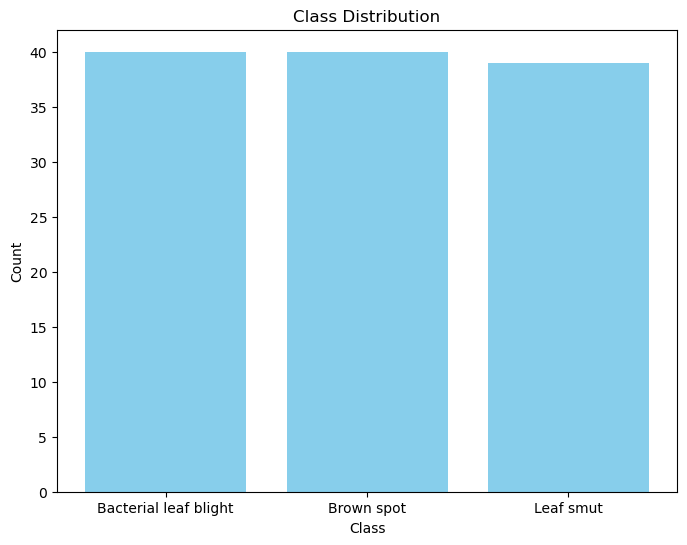

In [6]:
# Class names and counts
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
class_counts = [40, 40, 39]  # Replace with your actual counts

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

- From the graph we can clearly see that there are a total of 119 images. 
- 40 in Bacterial Leaf Blight and Brown Spot.
- 39 images available in Leaf Smut.

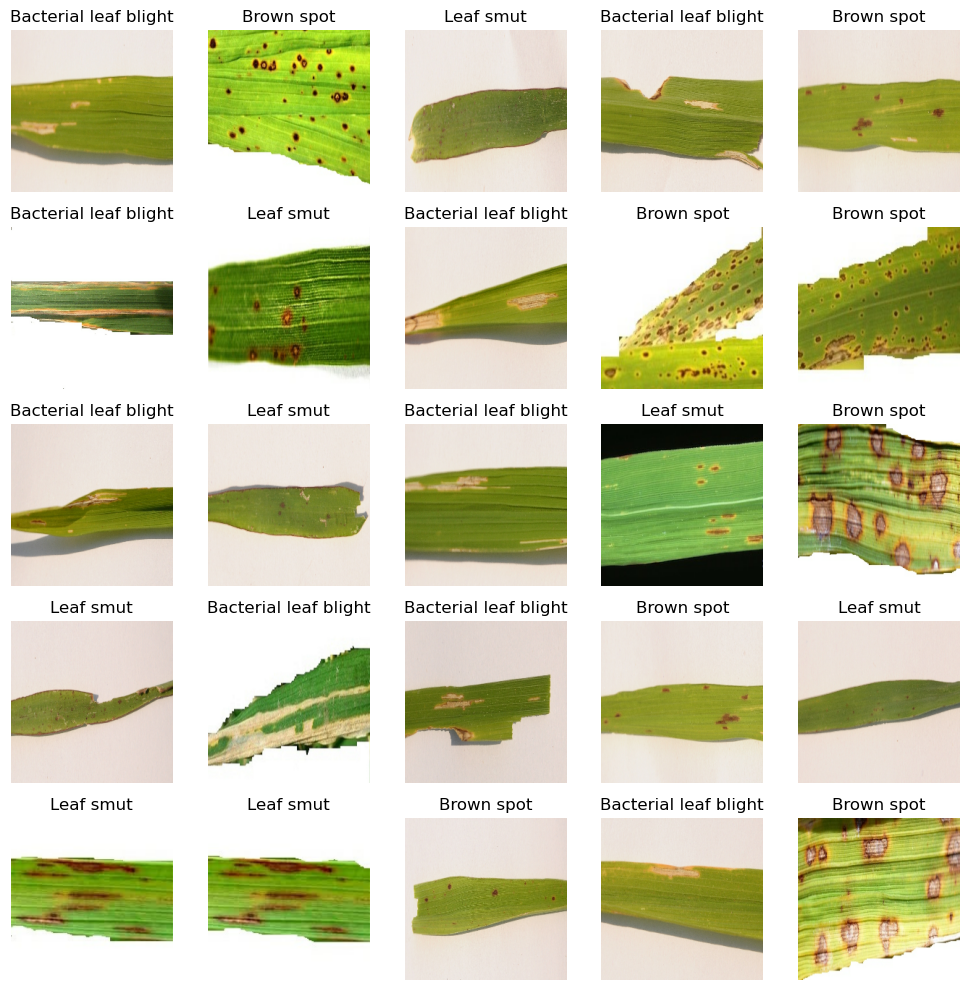

In [7]:
plt.figure(figsize=(10,10))
for images , labels in data.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.tight_layout()

### These are the inputs of our model.

In [8]:
# Create Dependent(y) and Independent(X) variable

X = []
y = []

for images , labels in data:
    X.append(images.numpy())
    y.append(labels.numpy())


# convert X , y list into numpy array

X = np.concatenate(X ,axis=0)
y = np.concatenate(y ,axis=0)

In [9]:
X

array([[[[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        [[  4.761161 ,   9.761161 ,   3.7611609],
         [  5.566964 ,   9.716518 ,   4.       ],
         [  9.417412 ,  10.611608 ,   5.6116076],
         ...,
         [  6.       ,  11.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ],
         [  8.       ,  10.       ,   5.       ]],

        ...,

        [[ 10.238839 ,  11.238839 ,   

### Normalisation

In [10]:
# Pixel values go from 1-255, we need to rescale them to [0,1]
# Rescale images ararys
X = X.astype('float32')/255

## Spliting Dataset into Train and Test/Validation data

In [11]:
# Splitt data into train and test / validation

X_train, X_test = X[:95 ],X[95:]
y_train, y_test = y[:95] ,y[95:]

In [12]:
X_train.shape , X_test.shape

((95, 224, 224, 3), (24, 224, 224, 3))

In [13]:
# Convert labels to one-hot encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train ,len(class_names))
y_test = to_categorical(y_test ,len(class_names))

## Model Creation

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten ,Dense ,Dropout

In [15]:
# relu - the usage of ReLU helps to prevent the exponential growth in the computation required to operate the neural network.
         #It has a derivative of either 0 or 1, depending on whether its input is negative or not
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])           

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30


3/3 [==============================] - 7s 1s/step - loss: 3.0219 - accuracy: 0.3026 - val_loss: 1.2690 - val_accuracy: 0.2105
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 1.1848 - accuracy: 0.3684 - val_loss: 1.0340 - val_accuracy: 0.4737
Epoch 3/30
3/3 [==============================] - 3s 714ms/step - loss: 1.0901 - accuracy: 0.3158 - val_loss: 0.9624 - val_accuracy: 0.4737
Epoch 4/30
3/3 [==============================] - 3s 847ms/step - loss: 1.0624 - accuracy: 0.4079 - val_loss: 0.9849 - val_accuracy: 0.6316
Epoch 5/30
3/3 [==============================] - 3s 931ms/step - loss: 1.0676 - accuracy: 0.3684 - val_loss: 0.8477 - val_accuracy: 0.4211
Epoch 6/30
3/3 [==============================] - 2s 725ms/step - loss: 0.9231 - accuracy: 0.5263 - val_loss: 0.8114 - val_accuracy: 0.5263
Epoch 7/30
3/3 [==============================] - 2s 725ms/step - loss: 0.8332 - accuracy: 0.6184 - val_loss: 0.7814 - val_accuracy: 0.6842
Epoch 8/30
3/3 [========

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 1s 598ms/step - loss: 1.4668 - accuracy: 0.4167
Test accuracy: 0.4167


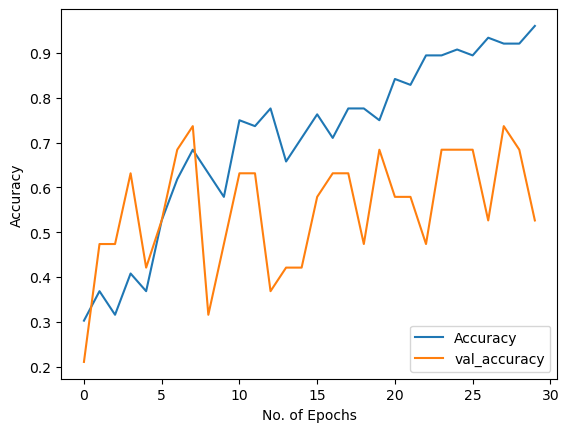

In [19]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### As the model shows only 41.67 % accuracy ,so we have to do the Data Augmentation to improve the accuracy.

## Data Augmentation

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Model Creation using different Optimizers after Data Augmentation

### 1.Adam optimizer

In [22]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [23]:
input_shape = (224, 224, 3)
num_classes = 3
model_da = create_model(input_shape, num_classes)

In [24]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [25]:
history = model_da.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 7s 2s/step - loss: 1.3824 - accuracy: 0.3053 - val_loss: 1.0734 - val_accuracy: 0.4167
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 1.1081 - accuracy: 0.3579 - val_loss: 1.1000 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 1.0982 - accuracy: 0.3684 - val_loss: 1.1002 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.0831 - accuracy: 0.3789 - val_loss: 1.1019 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 1.0543 - accuracy: 0.4947 - val_loss: 1.0587 - val_accuracy: 0.4167
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 1.0403 - accuracy: 0.4000 - val_loss: 1.0199 - val_accuracy: 0.4583
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 0.9851 - accuracy: 0.4947 - val_loss: 0.9576 - val_accuracy: 0.6250
Epoch 8/50
3/3 [=========================

In [26]:
test_loss, test_accuracy = model_da.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 204ms/step - loss: 0.3939 - accuracy: 0.8750
Test accuracy: 0.8750


### Model shows an accuracy of 87.50 % for Adam Optimizer.

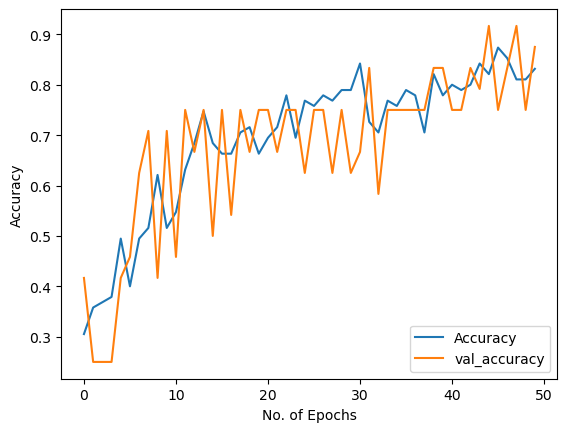

In [27]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### 2.RMSProp Optimizer

In [64]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [29]:
input_shape = (224, 224, 3)
num_classes = 3
model_rms = create_model(input_shape, num_classes)

In [30]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [31]:
history = model_rms.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 3.1445 - accuracy: 0.2421 - val_loss: 1.1335 - val_accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 1.1663 - accuracy: 0.3158 - val_loss: 1.1664 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 1.1086 - accuracy: 0.3053 - val_loss: 1.1019 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.1003 - accuracy: 0.2947 - val_loss: 1.0890 - val_accuracy: 0.4583
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 1.0904 - accuracy: 0.3368 - val_loss: 1.1033 - val_accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 1.0791 - accuracy: 0.3368 - val_loss: 1.0966 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 1.0891 - accuracy: 0.3684 - val_loss: 1.0834 - val_accuracy: 0.3750
Epoch 8/50
3/3 [=========================

In [32]:
test_loss, test_accuracy = model_rms.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 208ms/step - loss: 0.7572 - accuracy: 0.7083
Test accuracy: 0.7083


### Model shows an accuracy of 70.83% for RMSProp Optimizer 

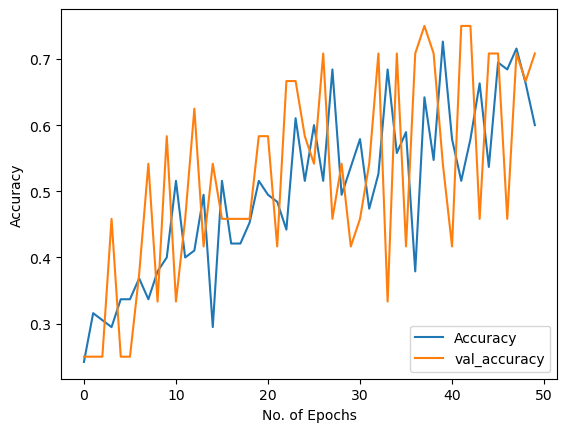

In [33]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### 3.SGD Optimizer

In [34]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
input_shape = (224, 224, 3)
num_classes = 3
model_sgd = create_model(input_shape, num_classes)

In [36]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [37]:
history = model_sgd.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 6s 1s/step - loss: 1.1022 - accuracy: 0.3053 - val_loss: 1.1033 - val_accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 1.0967 - accuracy: 0.4105 - val_loss: 1.1048 - val_accuracy: 0.2500
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 1.1029 - accuracy: 0.2947 - val_loss: 1.1084 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.0939 - accuracy: 0.3895 - val_loss: 1.1106 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 1.0953 - accuracy: 0.3579 - val_loss: 1.1054 - val_accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 1.0924 - accuracy: 0.3579 - val_loss: 1.1027 - val_accuracy: 0.2500
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 1.0979 - accuracy: 0.3579 - val_loss: 1.1003 - val_accuracy: 0.2500
Epoch 8/50
3/3 [=========================

In [38]:
test_loss, test_accuracy = model_sgd.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 216ms/step - loss: 1.0481 - accuracy: 0.4167
Test accuracy: 0.4167


### Model shows an accuracy of 41.7% for SGD Optimizer.

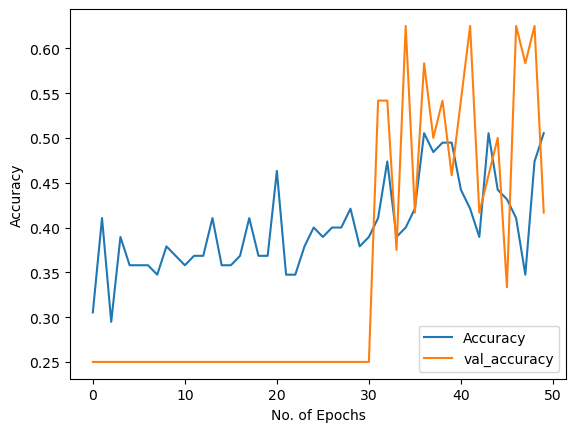

In [39]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### 4.ADAGRAD Optimizer

In [40]:
def create_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])
    model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [41]:
input_shape = (224, 224, 3)
num_classes = 3
model_adagrad = create_model(input_shape, num_classes)

In [42]:
augmented_data = datagen.flow(X_train, y_train, batch_size=32)

In [43]:
history = model_adagrad.fit(augmented_data, epochs=50,steps_per_epoch=len(X_train) // 25, validation_data=(X_test, y_test))

Epoch 1/50
3/3 [==============================] - 5s 1s/step - loss: 1.1085 - accuracy: 0.2842 - val_loss: 1.1004 - val_accuracy: 0.2500
Epoch 2/50
3/3 [==============================] - 4s 1s/step - loss: 1.1054 - accuracy: 0.3368 - val_loss: 1.0974 - val_accuracy: 0.2917
Epoch 3/50
3/3 [==============================] - 4s 1s/step - loss: 1.1066 - accuracy: 0.3579 - val_loss: 1.1000 - val_accuracy: 0.2500
Epoch 4/50
3/3 [==============================] - 4s 1s/step - loss: 1.1088 - accuracy: 0.3053 - val_loss: 1.1017 - val_accuracy: 0.2500
Epoch 5/50
3/3 [==============================] - 4s 1s/step - loss: 1.1036 - accuracy: 0.3368 - val_loss: 1.1014 - val_accuracy: 0.2500
Epoch 6/50
3/3 [==============================] - 4s 1s/step - loss: 1.1000 - accuracy: 0.3474 - val_loss: 1.0944 - val_accuracy: 0.3750
Epoch 7/50
3/3 [==============================] - 4s 1s/step - loss: 1.0858 - accuracy: 0.4421 - val_loss: 1.0973 - val_accuracy: 0.2917
Epoch 8/50
3/3 [=========================

In [44]:
test_loss, test_accuracy = model_adagrad.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 [==============================] - 0s 188ms/step - loss: 1.0770 - accuracy: 0.5000
Test accuracy: 0.5000


### Model shows an accuracy of 50% for ADAGRAD  Optimizer

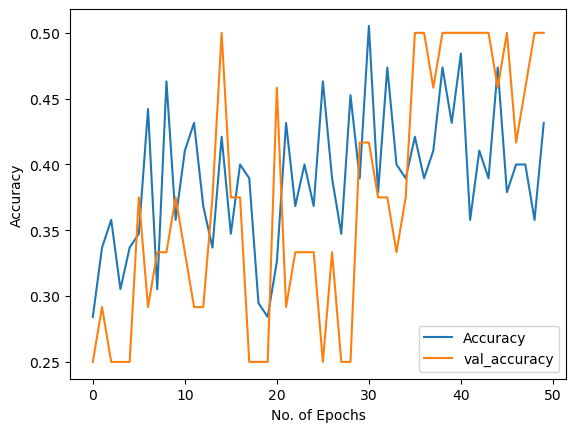

In [45]:
#Ploting the Accuracy and Validation Accuracy
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'] ,label='val_accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")

plt.legend(loc = "lower right")

### ACCURACY OF THE  MODEL WITH DIFFERENT OPTIMIZERS
- 1.Adam optimizer shows an accuracy of 87.50.
- 2.RMSProp Optimizer shows an accuracy of 70.83.
- 3.SGD Optimizer shows an accuracy of 41.67
- 4.ADAGRAD Optimizer shows an accuracy of 50 .
- From all of the Optimizer, **Adam Optimizer** shows the most Accuracy of **87.50%**.

## Predicting the Disease Class by using Adam Optimizer

In [46]:
# make prediction for X_test

y_prediction = model_da.predict(X_test)

leaf_class = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 2s 2s/step


In [47]:
# get the predicted class for each sample
predicted_classes = np.argmax(y_prediction, axis=1)
print(predicted_classes)

[2 0 2 1 0 2 2 2 0 2 0 0 1 0 2 2 0 0 0 1 0 0 2 0]


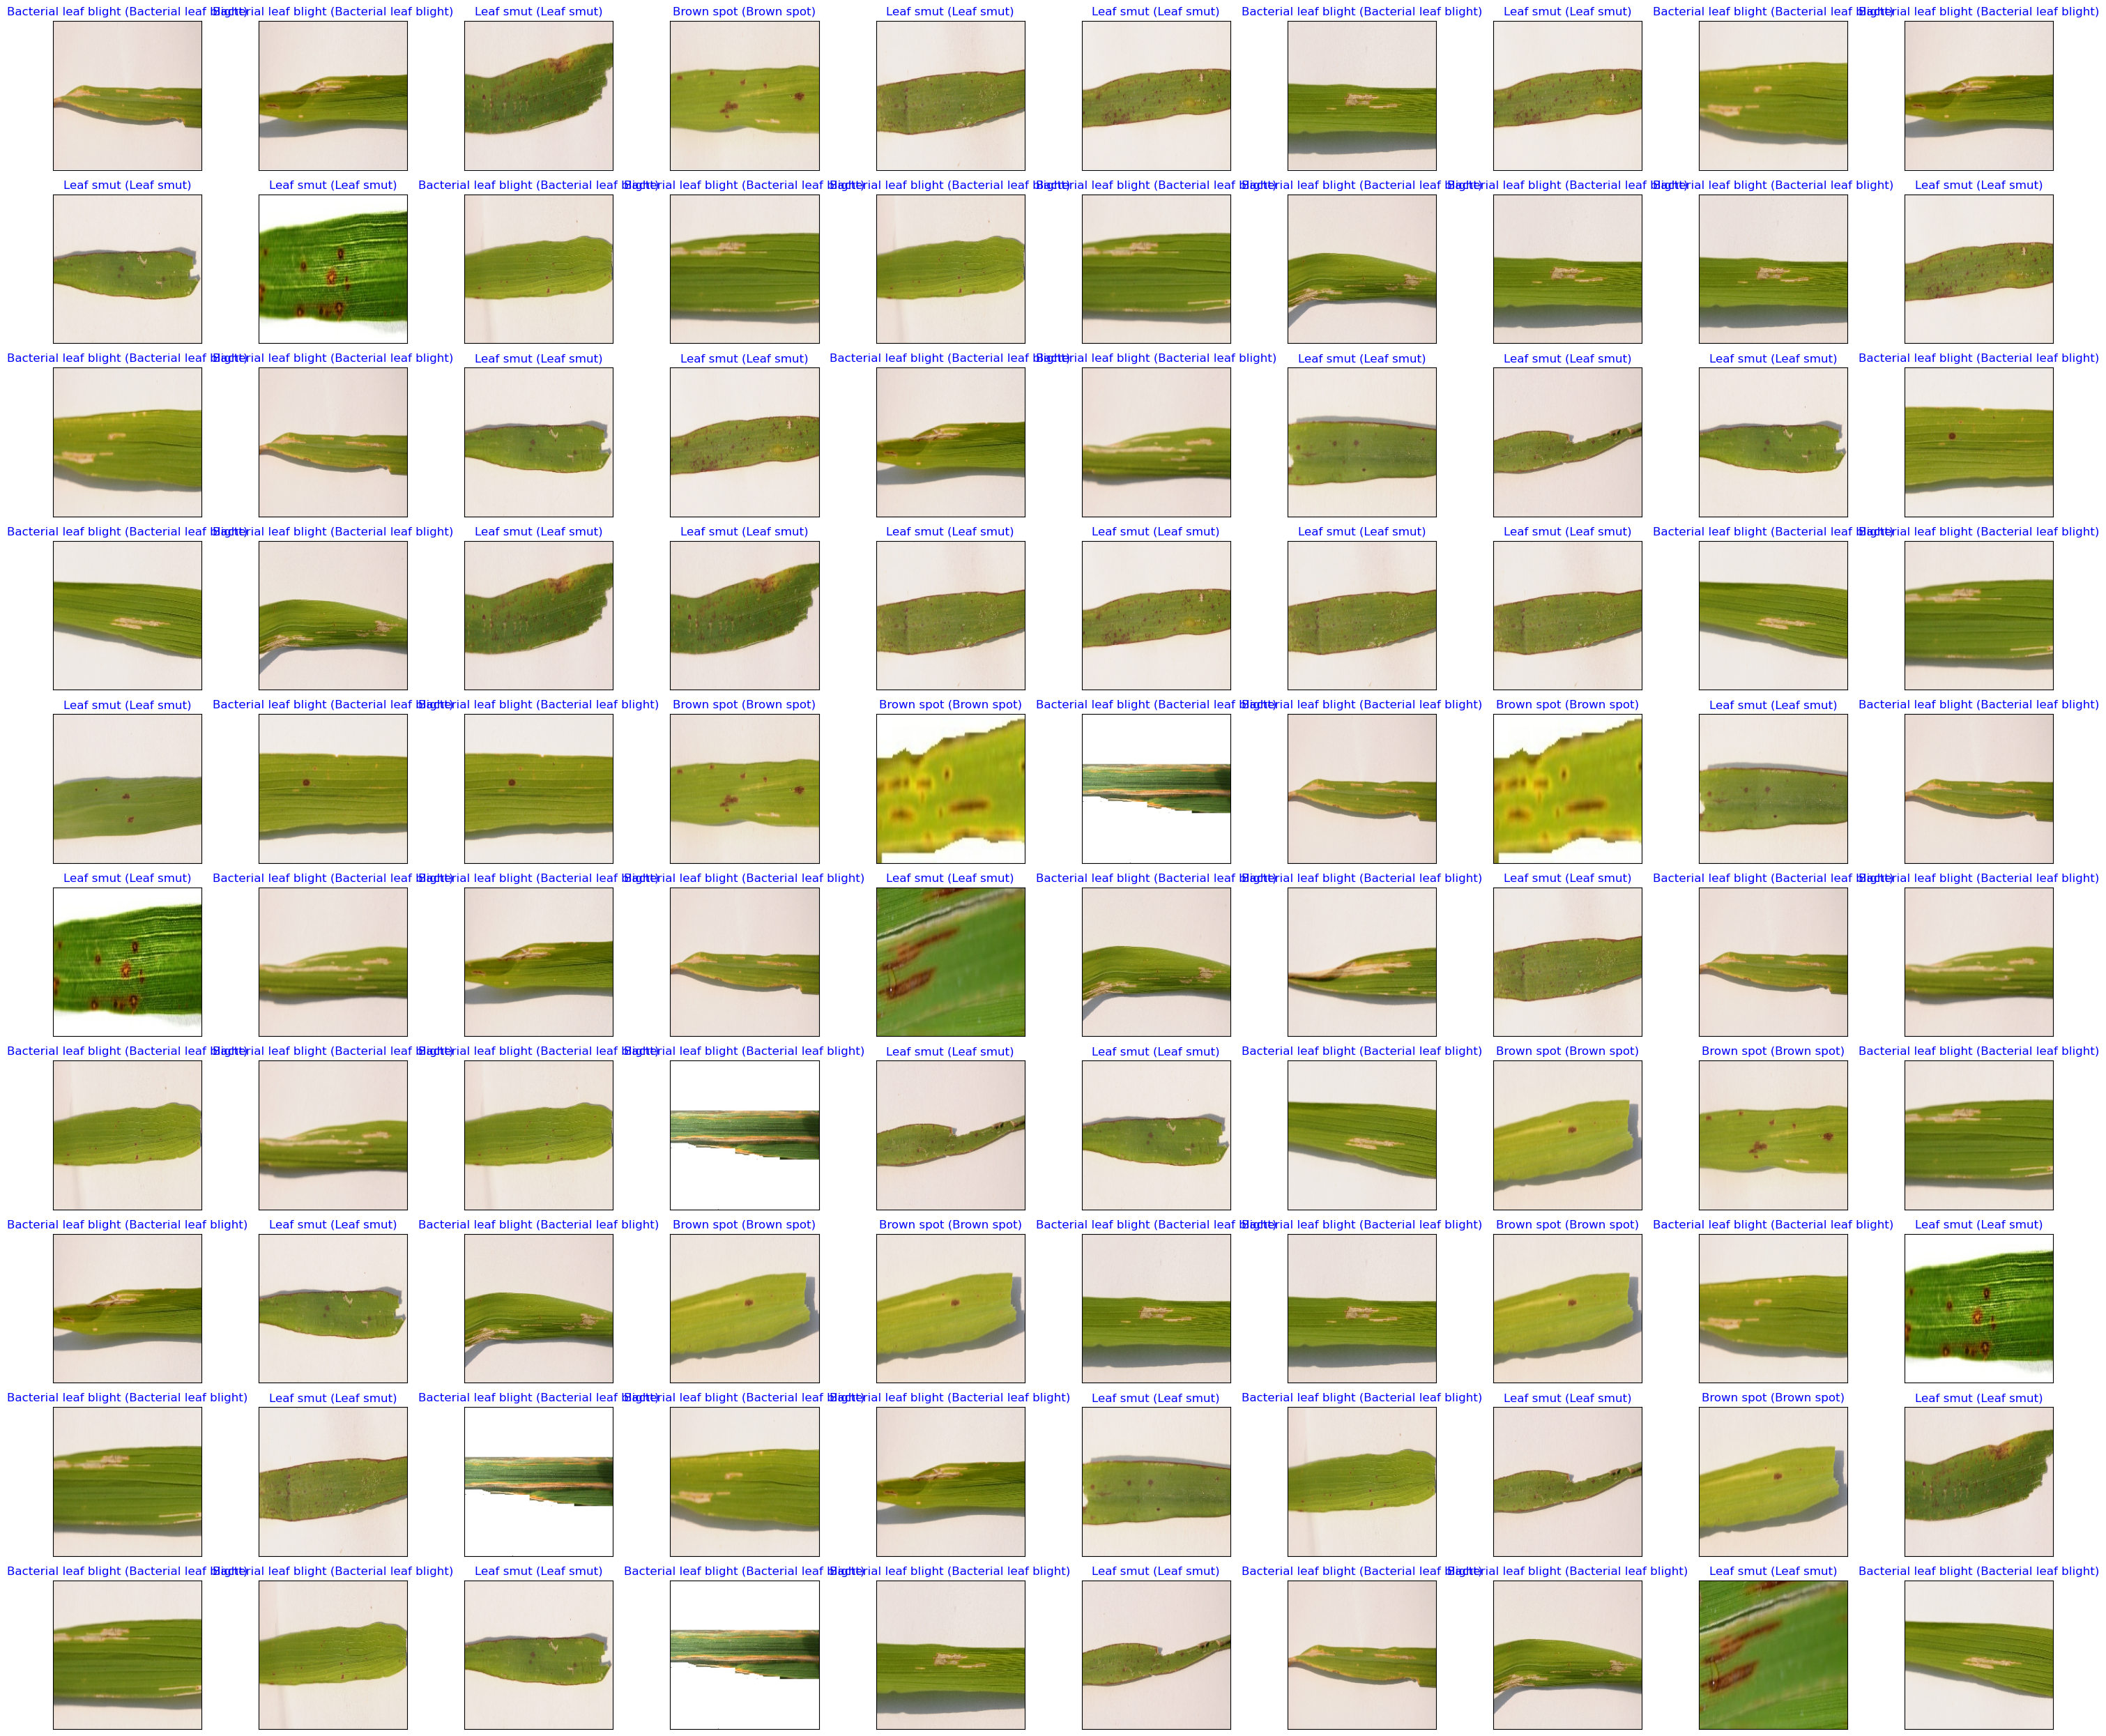

In [48]:
# Assuming you have 'y_hat' for predictions and 'y_test' for ground truth
# Assuming 'leaf_class' is a list of class labels

# Plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30, 25))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=100, replace=True)):
    ax = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))

    # Assuming 'y_hat' contains the model predictions
    pred_idx = np.argmax(y_prediction[idx])

    true_idx = np.argmax(y_prediction[idx])

    ax.set_title("{} ({})".format(leaf_class[pred_idx], leaf_class[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

plt.tight_layout()

## For checking the performance ,we took 100 samples and 100 samples were accurately predicted.

In [49]:
# print Accuracy

test_Accuracy = model_da.evaluate(X_test,y_test)
print(f"Model's Accuracy : {test_Accuracy[1]*100}")

1/1 [==============================] - 0s 280ms/step - loss: 0.3939 - accuracy: 0.8750
Model's Accuracy : 87.5


Save the model


In [50]:
import os
from tensorflow.keras.models import model_from_json

# Save model architecture as JSON
model_json = model_da.to_json()
with open(r"C:\Users\shash\Project\Project 2 - Rice Leaf Disease Prediction\model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model_da.save_weights(r"C:\Users\shash\Project\Project 2 - Rice Leaf Disease Prediction\model_weights.h5")

# Example of loading the model back from JSON and loading the weights
# Load model architecture from JSON
with open(r"C:\Users\shash\Project\Project 2 - Rice Leaf Disease Prediction\model.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load model weights
loaded_model.load_weights(r"C:\Users\shash\Project\Project 2 - Rice Leaf Disease Prediction\model_weights.h5")

# Now 'loaded_model' contains the same architecture and weights as 'model_da'


## Predicting the Diseases using the Image From the PC

In [53]:
!pip install opencv-python

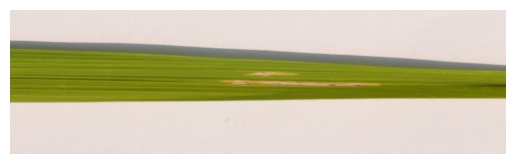

1/1 [==============================] - 0s 153ms/step
Predicted class: Bacterial leaf blight


In [56]:
import cv2
# Define a dictionary mapping class indices to class labels
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2: 'Leaf smut'}  # Update with your class labels

def predict_image_from_path(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Preprocess image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img = cv2.resize(img, (224, 224))  # adjust input size according to your model's input shape
    img = img.astype('float32')
    img /= 255.0  # normalize the pixel values
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = loaded_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

    # Print prediction
    print("Predicted class:", predicted_class_name)

# Example usage: Predict using a training image
image_path = r"C:\Users\shash\Project\Project 2 - Rice Leaf Disease Prediction\Riceleaf\Bacterial leaf blight\DSC_0367.JPG"  # Update with the path to your training image
predict_image_from_path(image_path)

## Predict the diseases using Images from Google using its URL

Enter the URL of the image: https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj2L9N0lhGjGtgkVlpwgZgesOFyXKkmtgIFgSKReftvom6FG-4MucKFJydYfsmJnSb8Zg42vMzr8yDII55T5wZNmKa0zxJSz25mLW1bc3algrXdqhyMCZ7yU-AwEZbmDG2MY9yUbtSIjjI/s640/Brown+spot+of+rice.jpg


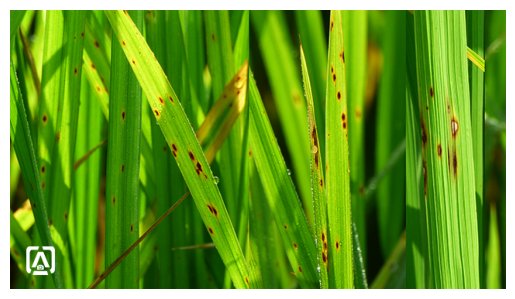

1/1 [==============================] - 0s 37ms/step
Predicted class: Leaf smut
Predicted class index: 2


In [63]:
import urllib
# Define a dictionary mapping class indices to class labels
class_labels = {0: 'Bacterial leaf blight', 1: 'Brown spot', 2:'Leaf smut' }


def predict_image_from_url():
    # Prompt user to enter image URL
    image_url = input("Enter the URL of the image: ")

    # Load image from URL
    resp = urllib.request.urlopen(image_url)
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

        # Preprocess image
    img = cv2.resize(img, (224, 224))  # adjust input size according to your model's input shape
    img = img.astype('float32')
    img /= 255.0  # normalize the pixel values
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = loaded_model.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = class_labels.get(predicted_class_index, "Unknown")

    # Print prediction
    print("Predicted class:", predicted_class_name)

        # Print prediction
    print("Predicted class index:", predicted_class_index)
    # You can map the index to class label based on your model's classes

# Example usage
predict_image_from_url()

## Conclusion:-
- The dataset contains 119 jpg images of different diseases.
- Here,we had tried 4 Optimizers for model creation in which **Adam Optimizer** shows the higher accuracy of **87.50%**.Thus we can conclude that it works well for the Rice Leaf Disease Detection.
- By using the Adam Optimizer we tried it with the 100 samples of test data and it showed a great output and later we tried it with image from the PC as well by using the URL.The model accurately predicted them.
- Thus we can conclude that CNN model with Adam Optimizer is the best one for predicting the Rice Leaf Prediction.

# Suggestion :-
- As an Asian, Rice plays a major role in our daily diet.Thus production of healthy rice are very important as well.
- Some of the suggestions from our Analysis are :-
- Taking the prevention method before the disease get worse.
- Awareness programs for every farmers throughout the country.
- Give proper instructions,effects and prevention methods.
- Provide proper pesticides,fertilizers and quality seeds by the Government can make a big change in farmers life.

# Risks :-
- Data Loading and processing.
- High computational time.
- Optimizer showing less accuracy.
- Less information

                                                     THE END